## Machine Learning

## This script contains the following:

### 1. Importing libraries and data

### 2. Data Cleaning

### 3. Data prep for regression analysis

### 4. Regression analysis

### 5. Performance improvement after removing outliers.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
import_path = r"C:\Users\tjsra\OneDrive\Desktop\CF data analyst\Achievement 6\02 Data\prepared data\Conditions_Contributing_to_COVID-19_Deaths_Cleaned.csv"

In [4]:
df = pd.read_csv(import_path)

## Data Cleaning

In [5]:
df.head()

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,2023-09-24,2020-01-01,2020-01-31,2020.0,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
1,2023-09-24,2020-02-01,2020-02-29,2020.0,2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
2,2023-09-24,2020-03-01,2020-03-31,2020.0,3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
3,2023-09-24,2020-04-01,2020-04-30,2020.0,4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
4,2023-09-24,2020-05-01,2020-05-31,2020.0,5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN


In [6]:
df.shape

(430560, 13)

In [8]:
print(df.columns)

Index(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State',
       'Condition Group', 'Condition', 'ICD10_codes', 'Age Group',
       'COVID-19 Deaths', 'Number of Mentions', 'Flag'],
      dtype='object')


In [10]:
# Drop the 'Flag' column
df = df.drop(columns=['Flag'])


In [11]:
# Check for missing values

df.isnull().sum()

Data As Of            0
Start Date            0
End Date              0
Year                  0
Month                 0
State                 0
Condition Group       0
Condition             0
ICD10_codes           0
Age Group             0
COVID-19 Deaths       0
Number of Mentions    0
dtype: int64

In [13]:
# Check for duplicates
duplicates = df.duplicated()


In [14]:
# Print out the duplicates
print("Number of duplicate rows:", duplicates.sum())
print("Duplicate rows:")
print(df[duplicates])

# Alternatively, to see only the indices of duplicate rows
duplicate_indices = df[df.duplicated()].index
print("Indices of duplicate rows:", duplicate_indices)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Data As Of, Start Date, End Date, Year, Month, State, Condition Group, Condition, ICD10_codes, Age Group, COVID-19 Deaths, Number of Mentions]
Index: []
Indices of duplicate rows: Index([], dtype='int64')


## Checking Extreme value.

C:\Users\tjsra\AppData\Local\Temp\ipykernel_2344\862003974.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['COVID-19 Deaths'], bins=25) # Shows extreme values
C:\Users\tjsra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='COVID-19 Deaths', ylabel='Density'>

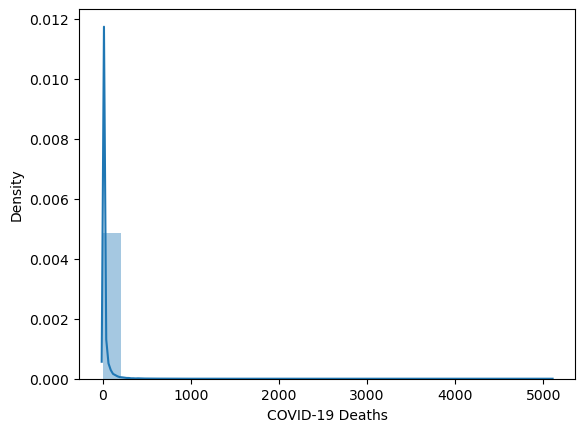

In [15]:
sns.distplot(df['COVID-19 Deaths'], bins=25) # Shows extreme values


In [16]:
df['COVID-19 Deaths'].mean() # Check the mean

10.910451505016722

In [17]:
df['COVID-19 Deaths'].median() # Check the median

1.0

In [18]:
df['COVID-19 Deaths'].max() # Check the max

5094.0

## Hypothesis:

### "Individuals aged 65 and above are more likely to experience higher mortality rates due to COVID-19 compared to individuals below the age of 65".

## Data prep for Regression analysis.

In [23]:
# Create a binary variable for age groups, combining 65-74, 75-84, and 85+ into one group '65 and above'
df['Age Group Combined'] = np.where(df['Age Group'].isin(['65-74', '75-84', '85+']), '65 and above', 'Below 65')

In [24]:
# Filter the DataFrame to include only the '65 and above' group
df_65_above = df[df['Age Group Combined'] == '65 and above']


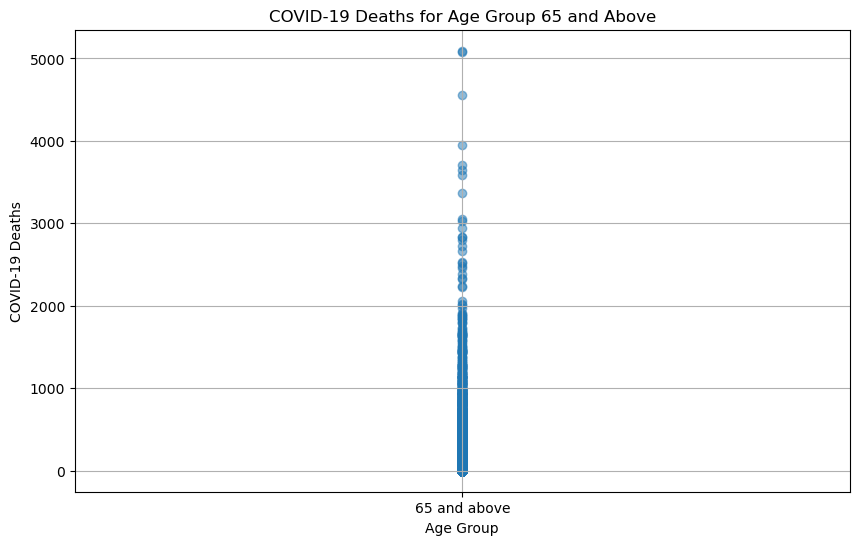

In [25]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_65_above['Age Group Combined'], df_65_above['COVID-19 Deaths'], alpha=0.5)
plt.title('COVID-19 Deaths for Age Group 65 and Above')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Deaths')
plt.grid(True)
plt.show()

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_65_above['Age Group Combined'].apply(lambda x: 1 if x == '65 and above' else 0).values.reshape(-1, 1)
y = df_65_above['COVID-19 Deaths'].values.reshape(-1, 1)

In [27]:
# Verify the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (161460, 1)
Shape of y: (161460, 1)


In [28]:
X

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [29]:
y

array([[0.],
       [0.],
       [9.],
       ...,
       [0.],
       [3.],
       [9.]])

In [30]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## Regression Analysis

In [31]:
# Create a regression object
regression = LinearRegression()

In [32]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)


LinearRegression()

In [33]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

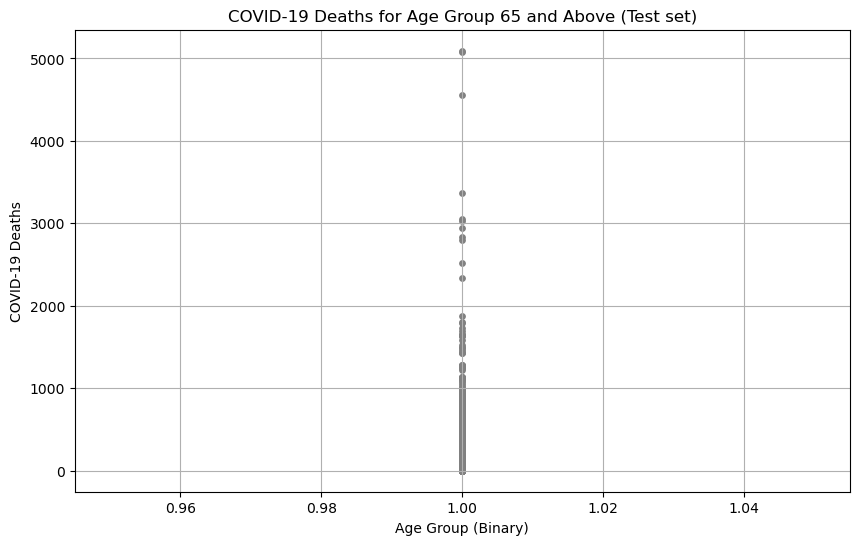

In [34]:
# Create a plot that shows the regression line from the model on the test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='gray', s=15)
plt.plot(X_test, y_predicted, color='red', linewidth=3)
plt.title('COVID-19 Deaths for Age Group 65 and Above (Test set)')
plt.xlabel('Age Group (Binary)')
plt.ylabel('COVID-19 Deaths')
plt.grid(True)
plt.show()

In [35]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [36]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.]]
Mean squared error:  7492.208680079435
R2 score:  -2.9698357967289368e-05


In [37]:
y_predicted

array([[21.2378475],
       [21.2378475],
       [21.2378475],
       ...,
       [21.2378475],
       [21.2378475],
       [21.2378475]])

In [38]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.0,21.237847
1,48.0,21.237847
2,34.0,21.237847
3,10.0,21.237847
4,1.0,21.237847
5,16.0,21.237847
6,235.0,21.237847
7,0.0,21.237847
8,0.0,21.237847
9,0.0,21.237847


### compare how the regression fits the training set

In [39]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.]]
Mean squared error:  5949.794448722721
R2 score:  0.0


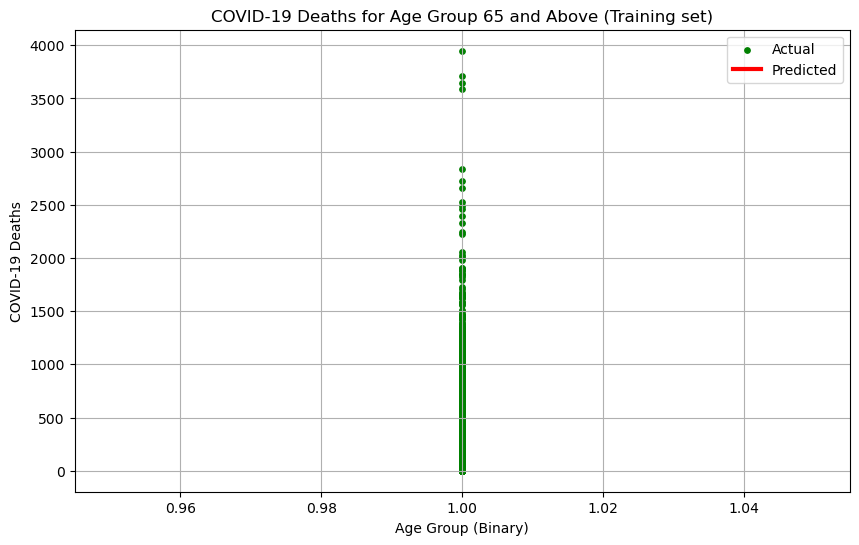

In [42]:
# Visualize the training set results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='green', s=15, label='Actual')
plt.plot(X_train, y_predicted_train, color='red', linewidth=3, label='Predicted')
plt.title('COVID-19 Deaths for Age Group 65 and Above (Training set)')
plt.xlabel('Age Group (Binary)')
plt.ylabel('COVID-19 Deaths')
plt.legend()
plt.grid(True)
plt.show()

## Performance improvement after removing outliers.

In [43]:
# Identifying outliers using the IQR method
Q1 = df_65_above['COVID-19 Deaths'].quantile(0.25)
Q3 = df_65_above['COVID-19 Deaths'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [44]:
# Remove outliers
df_no_outliers = df_65_above[(df_65_above['COVID-19 Deaths'] >= lower_bound) & (df_65_above['COVID-19 Deaths'] <= upper_bound)]


In [45]:
# Show the difference in dataset size
print("Original dataset size:", df_65_above.shape)
print("Dataset size after removing outliers:", df_no_outliers.shape)


Original dataset size: (161460, 14)
Dataset size after removing outliers: (141370, 14)


C:\Users\tjsra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


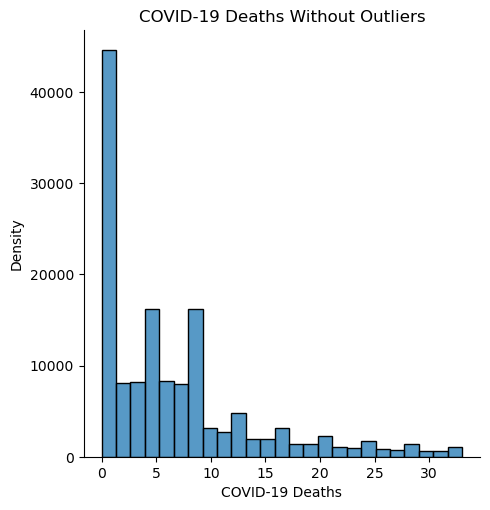

In [46]:
# Plot the data without outliers
sns.displot(df_no_outliers['COVID-19 Deaths'], bins=25)
plt.title('COVID-19 Deaths Without Outliers')
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Density')
plt.show()

In [47]:
# Convert to NumPy arrays without outliers
X_no_outliers = df_no_outliers['Age Group Combined'].apply(lambda x: 1 if x == '65 and above' else 0).values.reshape(-1, 1)
y_no_outliers = df_no_outliers['COVID-19 Deaths'].values.reshape(-1, 1)

In [48]:
# Split the data into a training set and a test set
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=0)


In [49]:
# Create a regression object
regression_no_outliers = LinearRegression()


In [50]:
# Fit the regression object onto the training set
regression_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

LinearRegression()

In [51]:
# Predict the values for the test set
y_predicted_no_outliers = regression_no_outliers.predict(X_test_no_outliers)


In [52]:
# Calculate the mean squared error and R2 score for the test set
rmse_no_outliers = mean_squared_error(y_test_no_outliers, y_predicted_no_outliers)
r2_no_outliers = r2_score(y_test_no_outliers, y_predicted_no_outliers)


In [53]:
# Print the model summary statistics for the test set
print('Slope (without outliers): ', regression_no_outliers.coef_)
print('Mean squared error (without outliers): ', rmse_no_outliers)
print('R2 score (without outliers): ', r2_no_outliers)


Slope (without outliers):  [[0.]]
Mean squared error (without outliers):  54.60390721282717
R2 score (without outliers):  -1.1501886976184039e-07


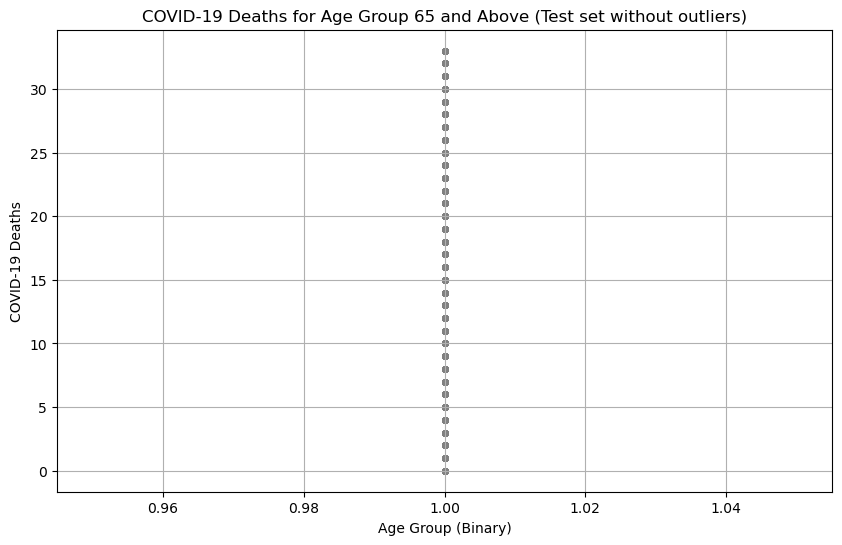

In [54]:
# Visualize the test set results without outliers
plt.figure(figsize=(10, 6))
plt.scatter(X_test_no_outliers, y_test_no_outliers, color='gray', s=15)
plt.plot(X_test_no_outliers, y_predicted_no_outliers, color='red', linewidth=3)
plt.title('COVID-19 Deaths for Age Group 65 and Above (Test set without outliers)')
plt.xlabel('Age Group (Binary)')
plt.ylabel('COVID-19 Deaths')
plt.grid(True)
plt.show()

### Interpretation
### The results suggest that removing outliers improved the mean squared error, but the model still did not find a meaningful relationship between the age group (binary) and COVID-19 deaths. The very low and negative R² score indicates that the model is not useful in predicting COVID-19 deaths based on the age group variable alone.Other factor such as underlying health conditions might provide more predictive power.

In [56]:
data = pd.DataFrame({'Actual':y_test_no_outliers .flatten(), 'Predicted':y_predicted_no_outliers .flatten()})
data.head(30)

,Actual,Predicted
0,2.0,6.623288
1,0.0,6.623288
2,19.0,6.623288
3,30.0,6.623288
4,0.0,6.623288
5,5.0,6.623288
6,0.0,6.623288
7,9.0,6.623288
8,4.0,6.623288
9,16.0,6.623288
